Here, using the pricing list of 'wine_sales_data.csv' I try to estimate the price of wines for Blue_berry wine . To do so I first select the information of wines related to the area of Blue_Burry factry, then based on their score I model the price and using the model, I predict the price of Blue_Berry wines.

In [215]:
import numpy as np
import pandas as pd
df_p=pd.read_csv('wine_sales_data.csv')
df_p

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [216]:
df_p["country"].value_counts()

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
England 

Selecting Portugal data and province of Vinho Verde

In [217]:
df_p=df_p[(df_p["country"] == "Portugal") & (df_p["province"] == "Vinho Verde") ]
df_p

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
277,277,Portugal,"Pure Alvarinho from the Monção region, it's ri...",Portal do Fidalgo,92,35.0,Vinho Verde,NaN,NaN,Alvarinho,Provam
993,993,Portugal,"With its typical prickle on the tongue, this i...",Campelo,85,10.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
994,994,Portugal,"Lightly spritzy, this tastes of crisp apple an...",Miranda,85,9.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
1378,1378,Portugal,Some wood aging has rounded out this fruity wi...,Daphne,91,NaN,Vinho Verde,NaN,NaN,Loureiro,Casal Paço Padreiro
1558,1558,Portugal,This medium-sweet rosé is a familiar style of ...,Campelo,84,10.0,Vinho Verde,NaN,NaN,Rosé,Caves Campelo
...,...,...,...,...,...,...,...,...,...,...,...
141129,141129,Portugal,"A simple, rather earthy, dry style of vinho ve...",NaN,83,9.0,Vinho Verde,NaN,NaN,Portuguese White,Adega Cooperativa Ponte de Lima
141143,141143,Portugal,The estate wine from Vila Verde which is in Lo...,NaN,82,8.0,Vinho Verde,NaN,NaN,Portuguese White,Casa de Vila Verde
141148,141148,Portugal,"The standard style of inexpensive Vinho Verde,...",Gatão,82,6.0,Vinho Verde,NaN,NaN,Portuguese White,Borges
143472,143472,Portugal,"Very nice Vinho Verde, with fresh, green apple...",NaN,86,9.0,Vinho Verde,NaN,NaN,White Blend,Casa de Vila Verde


In [218]:
df_p.isna().sum()

Unnamed: 0       0
country          0
description      0
designation     95
points           0
price           86
province         0
region_1       396
region_2       396
variety          0
winery           0
dtype: int64

In [219]:
df_p['winery'].value_counts()

Aveleda                             33
Casa do Valle                       27
Wines & Winemakers                  26
Campelo                             20
Provam                              19
Borges                              19
Casal Paço Padreiro                 18
Adega Cooperativa Ponte de Lima     16
Solar de Pinheiro                   15
Adega Cooperativa Ponte de Barca    14
Vercoope                            11
Casa de Vila Verde                  10
Caves Aliança                       10
Adega de Monção                     10
Quintas de Melgaço                  10
Quinta das Arcas                     9
Quinta de Gomariz                    9
Quinta do Ameal                      8
Viniverde                            8
Messias                              7
José Maria da Fonseca                6
Quinta da Raza                       6
Caves Campelo                        6
J. Portugal Ramos                    5
Sogrape                              5
Vera                     

In [220]:
df_p=df_p[["points","price","variety"]]
df_p.index=range(len(df_p))
df_p

,points,price,variety
0,92,35.0,Alvarinho
1,85,10.0,Portuguese White
2,85,9.0,Portuguese White
3,91,NaN,Loureiro
4,84,10.0,Rosé
...,...,...,...
391,83,9.0,Portuguese White
392,82,8.0,Portuguese White
393,82,6.0,Portuguese White
394,86,9.0,White Blend


Sort the wine types based on grapes type in "veriety" column

In [221]:
df_p["variety"].value_counts()

Portuguese White        240
Loureiro                 45
Alvarinho                43
Rosé                     43
Portuguese Red            9
Vinhão                    5
Avesso                    3
Arinto                    2
Portuguese Sparkling      2
Portuguese Rosé           1
Espadeiro                 1
Azal                      1
White Blend               1
Name: variety, dtype: int64

White wine: Portuguese White, Loureiro, Alvarinho, Avesso,Arinto, Azal 

red wines: Portuguese Red, Vinhão, Espadeiro 


In [222]:
list(np.zeros(len(w)))


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [223]:
w=["Portuguese White", "Loureiro", "Alvarinho", "Avesso","Arinto", "Azal" ]
r=["Portuguese Red", "Vinhão", "Espadeiro"]
df_p["variety"]=df_p["variety"].replace(w, list(np.zeros(len(w))))
df_p["variety"]=df_p["variety"].replace(r, list(np.ones(len(r))))



/var/folders/nm/btrww2_94pncl34mb0yt49j80000gn/T/ipykernel_8048/3217813696.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p["variety"]=df_p["variety"].replace(w, list(np.zeros(len(w))))
/var/folders/nm/btrww2_94pncl34mb0yt49j80000gn/T/ipykernel_8048/3217813696.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p["variety"]=df_p["variety"].replace(r, list(np.ones(len(r))))


In [224]:
df_p['variety'].value_counts()

0.0                     334
Rosé                     43
1.0                      15
Portuguese Sparkling      2
Portuguese Rosé           1
White Blend               1
Name: variety, dtype: int64

remove other types of grapes

In [225]:
df_p=df_p[(df_p["variety"] == 0.0 ) | (df_p["variety"] == 1.0)]
df_p['variety'].value_counts()

0.0    334
1.0     15
Name: variety, dtype: int64

In [226]:
df_p["variety"]=df_p["variety"].astype("int32")
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 0 to 395
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   points   349 non-null    int64  
 1   price    277 non-null    float64
 2   variety  349 non-null    int32  
dtypes: float64(1), int32(1), int64(1)
memory usage: 9.5 KB


/var/folders/nm/btrww2_94pncl34mb0yt49j80000gn/T/ipykernel_8048/3073034313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p["variety"]=df_p["variety"].astype("int32")


In [227]:
df_p.isna().sum()

points      0
price      72
variety     0
dtype: int64

to fill the nan values, first sort the data based on points and then interpolate the price

In [228]:
df_p=df_p.sort_values(by=['points'])
df_p

,points,price,variety
31,80,8.0,0
193,82,5.0,0
36,82,10.0,1
92,82,NaN,0
118,82,10.0,1
...,...,...,...
3,91,NaN,0
356,91,13.0,0
354,92,25.0,0
112,92,33.0,0


In [229]:
pr_int=np.interp(np.arange(len(df_p['price'])), 
          np.arange(len(df_p['price']))[np.isnan(df_p['price']) == False], 
          df_p['price'][np.isnan(df_p['price']) == False])
        
df_p['price']=pr_int
df_p

,points,price,variety
31,80,8.000000,0
193,82,5.000000,0
36,82,10.000000,1
92,82,10.000000,0
118,82,10.000000,1
...,...,...,...
3,91,14.333333,0
356,91,13.000000,0
354,92,25.000000,0
112,92,33.000000,0


In [230]:
df_p

,points,price,variety
31,80,8.000000,0
193,82,5.000000,0
36,82,10.000000,1
92,82,10.000000,0
118,82,10.000000,1
...,...,...,...
3,91,14.333333,0
356,91,13.000000,0
354,92,25.000000,0
112,92,33.000000,0


array([[<AxesSubplot:title={'center':'points'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'variety'}>, <AxesSubplot:>]],
      dtype=object)

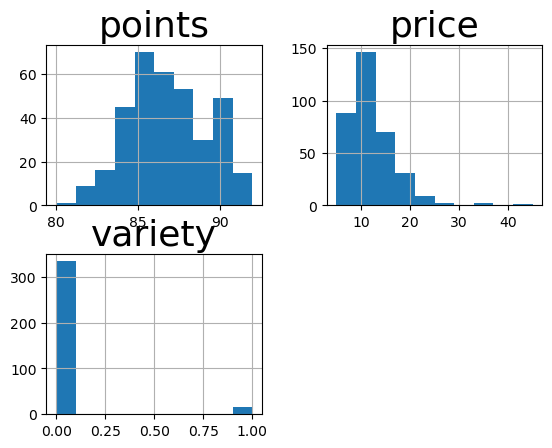

In [231]:
import matplotlib.pyplot as plt
df_p.hist()

Text(0, 0.5, 'Wine price (Euro)')

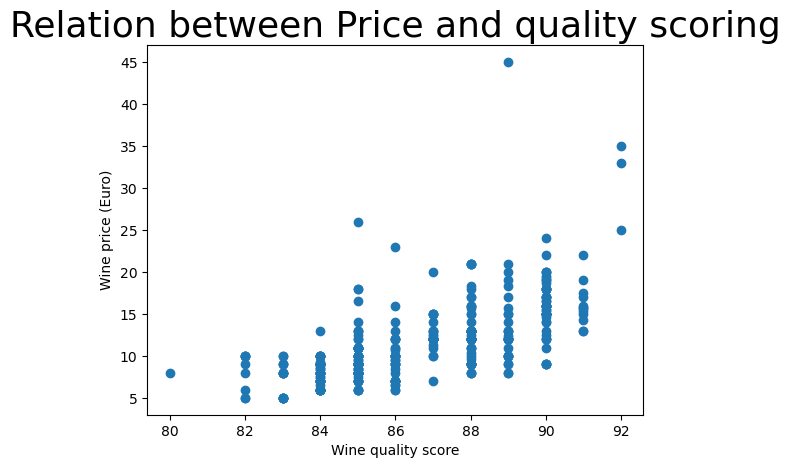

In [232]:
plt.scatter(df_p["points"],df_p["price"])
plt.title('Relation between Price and quality scoring')
plt.xlabel('Wine quality score')
plt.ylabel('Wine price (Euro)')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb6e4c02130>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb6e4c026d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb6e564be20>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb6e4c02c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb6e4c02f40>],
 'means': []}

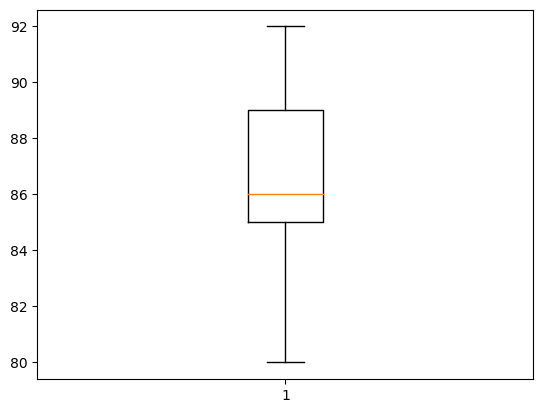

In [233]:
plt.boxplot(df_p['points'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb6e4c84460>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb6e4c84a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb6e4c84190>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb6e4c84fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb6e4c932b0>],
 'means': []}

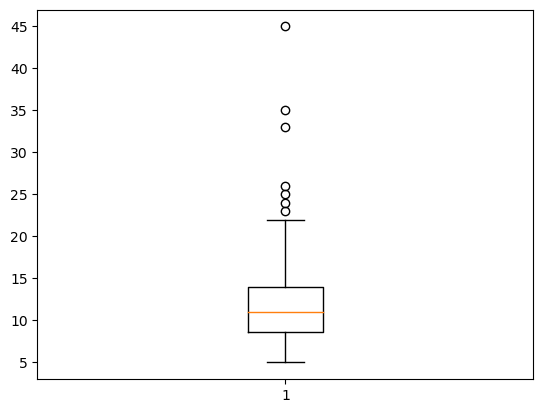

In [234]:
plt.boxplot(df_p['price'])

In [235]:
df_p.describe()

,points,price,variety
count,349.000000,349.000000,349.000000
mean,86.704871,11.712034,0.042980
std,2.456870,4.747362,0.203103
min,80.000000,5.000000,0.000000
25%,85.000000,8.666667,0.000000
50%,86.000000,11.000000,0.000000
75%,89.000000,14.000000,0.000000
max,92.000000,45.000000,1.000000


In [236]:
df_p

,points,price,variety
31,80,8.000000,0
193,82,5.000000,0
36,82,10.000000,1
92,82,10.000000,0
118,82,10.000000,1
...,...,...,...
3,91,14.333333,0
356,91,13.000000,0
354,92,25.000000,0
112,92,33.000000,0


removing outliers

In [237]:
Q1=df_p['price'].quantile(0.25)
Q3=df_p['price'].quantile(0.75)
IQR=Q3-Q1
df_p=df_p[df_p['price'] <= (Q3+1.5*IQR)]


price data after removing outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb6e57f7c10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb6e58091f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb6e57f7940>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb6e5809790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb6e5809a60>],
 'means': []}

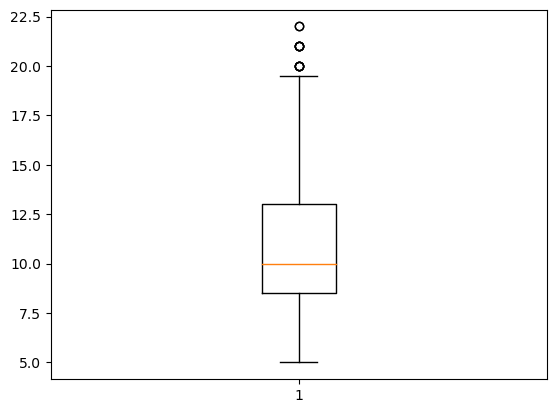

In [238]:
plt.boxplot(df_p['price'])

array([[<AxesSubplot:title={'center':'points'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'variety'}>, <AxesSubplot:>]],
      dtype=object)

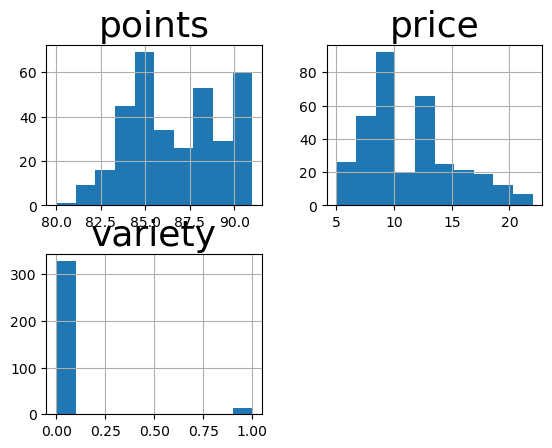

In [239]:
df_p.hist()

In [240]:
df_p.index=range(len(df_p))
df_p

,points,price,variety
0,80,8.000000,0
1,82,5.000000,0
2,82,10.000000,1
3,82,10.000000,0
4,82,10.000000,1
...,...,...,...
337,91,22.000000,0
338,91,17.000000,0
339,91,15.666667,0
340,91,14.333333,0


model the price based on wine type and ite point using linear regresion

In [241]:
x=df_p[["points", "variety"]]
y=df_p['price']

In [242]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Ridge
from xgboost import XGBClassifier as Xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve

In [243]:
X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=0.3,shuffle=True, random_state=42) 

In [244]:

model=Ridge(alpha=0.4)
par=[{'alpha': [0.1,0.5,1], 'tol': [0.001,0.0001,0.01]}]
rcv=RandomizedSearchCV(estimator=model, param_distributions=par, n_iter=6, cv=10)
rcv_m=rcv.fit(X_train,y_train)

print('Best parameters are',rcv_m.best_params_)
pred=rcv_m.best_estimator_.predict(X_test)
rmse=mean_squared_error(y_test, pred )
print(rcv_m.best_estimator_.score(X_train,y_train))
print(rcv_m.best_estimator_.score(X_test,y_test))



Best parameters are {'tol': 0.01, 'alpha': 1}
0.49364273624868327
0.45553518228835566


In [245]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,scoring= 'neg_root_mean_squared_error')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

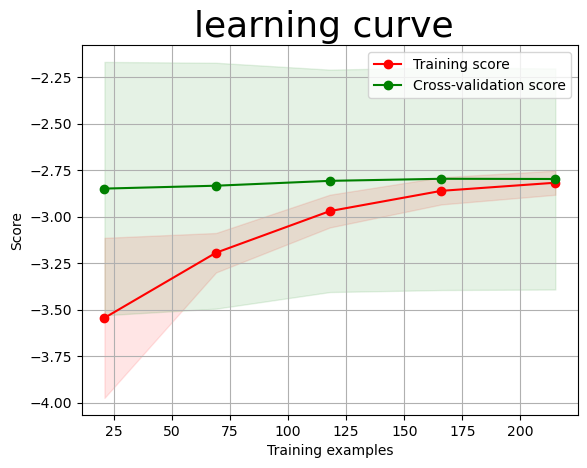

In [246]:
plot_learning_curve(estimator = rcv_m.best_estimator_,title = "learning curve ",
X = X_train, y = y_train, cv = 10)
plt.show()

In [247]:
red_wine=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
white_wine=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')


In [248]:
red_wine=red_wine.drop_duplicates()
white_wine=white_wine.drop_duplicates()
red_wine['type']=1
white_wine['type']=0
red_wine['type'].astype('int32')
white_wine['type'].astype('int32')
total_wine=pd.concat([red_wine,white_wine])


total_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [249]:
total_wine['quality'].value_counts()

6    2323
5    1752
7     856
4     206
8     148
3      30
9       5
Name: quality, dtype: int64

In [250]:
df_p['points'].value_counts()

85    69
88    53
90    48
84    45
86    34
89    29
87    26
83    16
91    12
82     9
80     1
Name: points, dtype: int64

In [251]:
df_p.describe()

,points,price,variety
count,342.000000,342.000000,342.000000
mean,86.649123,11.334795,0.040936
std,2.419311,3.841294,0.198432
min,80.000000,5.000000,0.000000
25%,85.000000,8.500000,0.000000
50%,86.000000,10.000000,0.000000
75%,89.000000,13.000000,0.000000
max,91.000000,22.000000,1.000000


I transfer the quality score (by mulipying to 10) to be in the same range as points in the pricing dataset

In [252]:
total_wine['quality']=80+((11/6)*(total_wine['quality']-3))
total_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,83.666667,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,83.666667,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,83.666667,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,85.500000,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,83.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,85.500000,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,83.666667,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,85.500000,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,87.333333,0


correct indeces

In [253]:
total_wine.index=range(len(total_wine))
total_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,83.666667,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,83.666667,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,83.666667,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,85.500000,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,83.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,85.500000,0
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,83.666667,0
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,85.500000,0
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,87.333333,0


renme columns of quality and type to be identical with the columns of price data set

In [254]:
total_wine=total_wine.rename(columns={'quality': 'points', 'type': 'variety'})

In [255]:
x_t=total_wine[['points','variety']]


In [256]:
x_t

,points,variety
0,83.666667,1
1,83.666667,1
2,83.666667,1
3,85.500000,1
4,83.666667,1
...,...,...
5315,85.500000,0
5316,83.666667,0
5317,85.500000,0
5318,87.333333,0


In [257]:
p_t=rcv_m.best_estimator_.predict(x_t)

In [258]:
p_t

array([ 9.03267643,  9.03267643,  9.03267643, ..., 10.03289504,
       12.19119524, 10.03289504])

add price to total_wine

In [259]:
total_wine['price']=p_t

Let's display box plot for low,medium,high quality wines with their prices. I convert back the points to the range of 6-11 using: I shift the interval of quality (3-9) to the interval of points using: 𝑓(𝑡)=𝑐+((𝑑−𝑐)/(𝑏−𝑎))(𝑡−𝑎)

In [260]:
total_wine['points']=3+((6/11)*(total_wine['points']-80))

In [261]:
import seaborn as sns
total_wine['qulity_label']=total_wine['points'].apply(lambda x: 'low' if x <=  5 else 'medium' if x<=7 else 'high')
total_wine['qulity_label']=pd.Categorical(total_wine['qulity_label'], categories=('high','low','medium'))
total_wine['qulity_label'].value_counts()

medium    4931
low        236
high       153
Name: qulity_label, dtype: int64

Text(0.5, 1.0, 'Red wine')

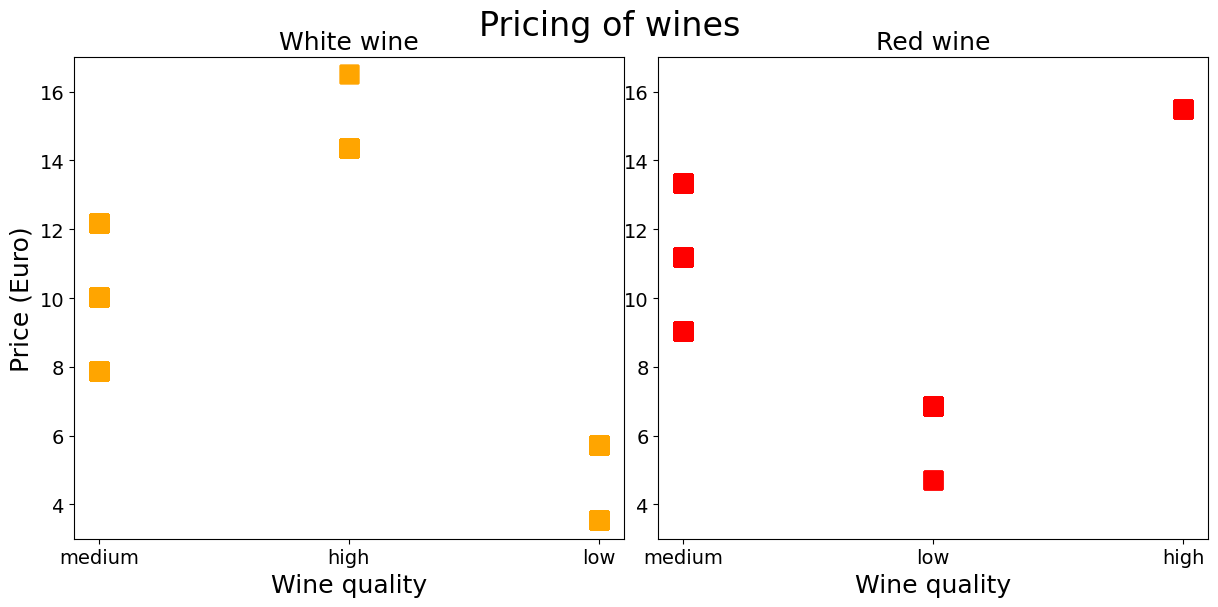

In [262]:
plt.figure(figsize=(12,6))
plt.subplot2grid((1,2),(0,0))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.scatter(total_wine[total_wine['variety']== 0 ]['qulity_label'], total_wine[total_wine['variety']== 0 ]['price'], marker='s',s=150,c='orange')
plt.suptitle('Pricing of wines',fontsize=24)
plt.xlabel('Wine quality',fontsize=18)
plt.ylim((3,17))
plt.ylabel('Price (Euro)',fontsize=18)
plt.title("White wine",fontsize=18)
plt.subplot2grid((1,2),(0,1))
plt.scatter(total_wine[total_wine['variety']== 1 ]['qulity_label'], total_wine[total_wine['variety']== 1 ]['price'], marker='s',s=150,c='r')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Wine quality',fontsize=18)
plt.ylim((3,17))
plt.tight_layout(pad=0)

plt.title("Red wine", fontsize=18)

(array([  30.,  153.,   53., 1175., 2365.,  535.,  689.,  167.,  131.,
          22.]),
 array([ 3.55799443,  4.85297456,  6.14795468,  7.4429348 ,  8.73791492,
        10.03289504, 11.32787516, 12.62285528, 13.9178354 , 15.21281552,
        16.50779564]),
 <BarContainer object of 10 artists>)

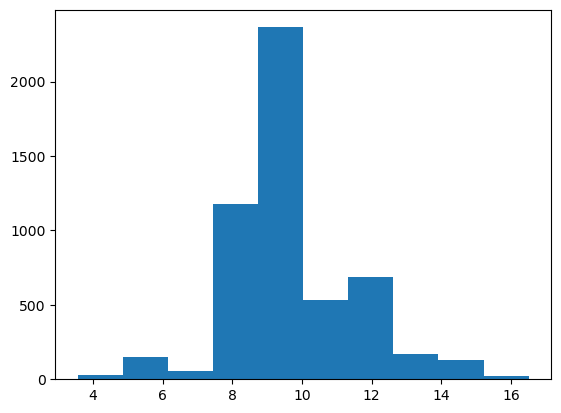

In [263]:
plt.hist(total_wine['price'])

<AxesSubplot:xlabel='qulity_label', ylabel='price'>

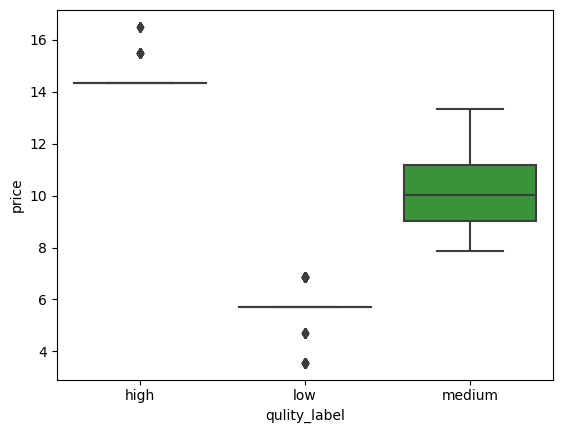

In [264]:
sns.boxplot(x=total_wine['qulity_label'], y=total_wine['price'])